<a href="https://colab.research.google.com/github/kkkwakye/coronary-Heart-disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


# **# Data Cleaning**

In [ ]:
import io
import numpy as np
import pandas as pd
Dataset = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))

In [ ]:
## Descriptive Stats

Dataset.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4135.000000,4211.000000,4187.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,49.580189,1.979444,9.005937,0.029615,0.005896,0.310613,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,8.572942,1.019791,11.922462,0.169544,0.076569,0.462799,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
Dataset.head(10)

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0
5,female,43,2.0,No,0.0,0.0,0,1,No,228.0,180.0,110.0,30.30,77.0,99.0,0
6,female,63,1.0,No,0.0,0.0,0,0,No,205.0,138.0,71.0,33.11,60.0,85.0,1
7,female,45,2.0,Yes,20.0,0.0,0,0,No,313.0,100.0,71.0,21.68,79.0,78.0,0
8,male,52,1.0,No,0.0,0.0,0,1,No,260.0,141.5,89.0,26.36,76.0,79.0,0
9,male,43,1.0,Yes,30.0,0.0,0,1,No,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
#Dataset.skew()

In [ ]:
Dataset.shape

(4240, 16)

In [ ]:
Dataset.dtypes

Sex                 object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
Dataset['Sex']=Dataset['Sex'].astype('category')

In [ ]:
Dataset['Sex']=Dataset['Sex'].cat.codes

In [ ]:
#Dataset.drop('sex_codes',axis=1)

In [ ]:
Dataset['currentSmoker']=Dataset['currentSmoker'].astype('category')
Dataset['diabetes']=Dataset['diabetes'].astype('category')
Dataset['currentSmoker']=Dataset['currentSmoker'].cat.codes
Dataset['diabetes']=Dataset['diabetes'].cat.codes

In [ ]:
Dataset

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
#Dataset.drop('sex_codes',axis=1)

In [ ]:
#Dataset1= Dataset.drop('sex_codes',axis=1,)

In [ ]:
Dataset.dtypes

Sex                   int8
age                  int64
education          float64
currentSmoker         int8
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes              int8
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
Dataset.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Filling missing values with mean of the columns
for value in ['cigsPerDay', 'totChol','BMI','glucose','heartRate']:
    Dataset[value].fillna(round(Dataset[value].mean()), inplace= True)

  

In [ ]:
Dataset

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# Removing the rest of the missing values. this affects only education and BPMeds
Dataset.dropna(how='any', inplace=True)

In [ ]:
Dataset.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
Dataset.describe()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4240.000000,4187.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005896,0.029615,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.801693,75.879009,81.966981,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.881610,0.169544,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070708,12.023930,22.831751,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
from scipy.stats import boxcox
import numpy as np
from numpy import array
from scipy.linalg import svd
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
import numpy
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

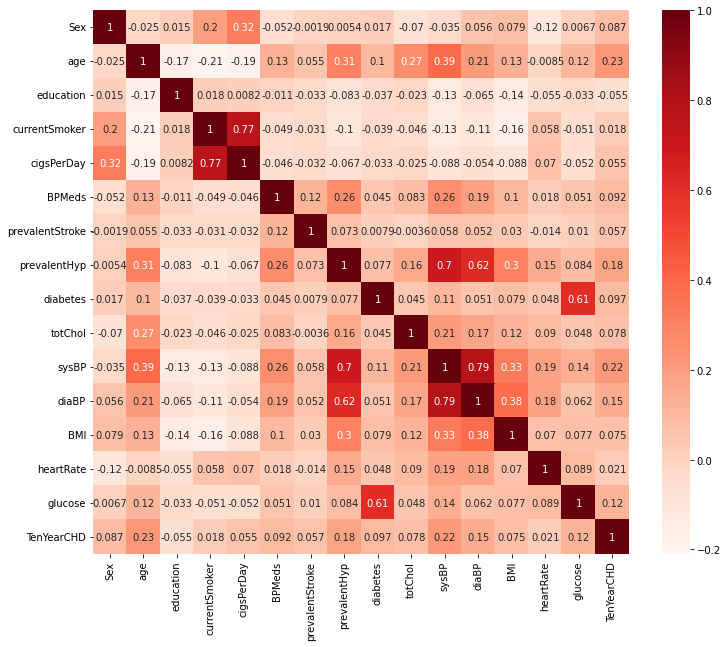

In [ ]:
plt.figure(figsize=(12,10))
cor = Dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

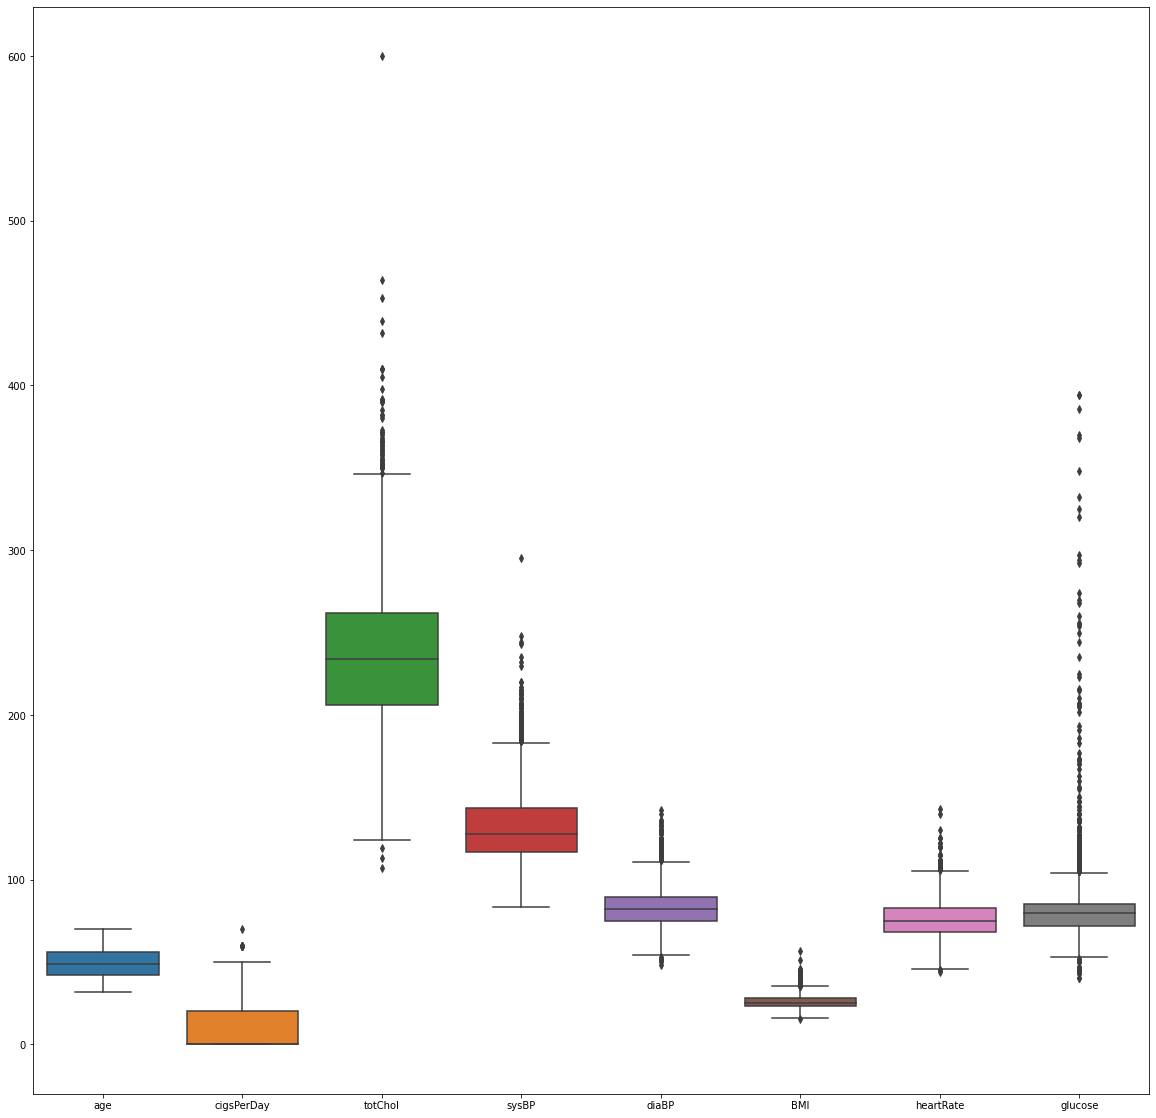

In [ ]:


num_colns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dataset_1 = Dataset[num_colns]

plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=Dataset_1)
plt.show()

In [ ]:
print(Dataset_1['totChol'].max())
print(Dataset_1['sysBP'].max())

600.0
295.0


In [ ]:
print(Dataset_1['cigsPerDay'].quantile(0.10))
print(Dataset_1['cigsPerDay'].quantile(0.90))
print(Dataset_1['totChol'].quantile(0.10))
print(Dataset_1['totChol'].quantile(0.90))
print(Dataset_1['sysBP'].quantile(0.10))
print(Dataset_1['sysBP'].quantile(0.90))
print(Dataset_1['diaBP'].quantile(0.10))
print(Dataset_1['diaBP'].quantile(0.90))
print(Dataset_1['BMI'].quantile(0.10))
print(Dataset_1['BMI'].quantile(0.90))
print(Dataset_1['heartRate'].quantile(0.10))
print(Dataset_1['heartRate'].quantile(0.90))
print(Dataset_1['glucose'].quantile(0.10))
print(Dataset_1['glucose'].quantile(0.90))

0.0
25.0
183.0
293.0
109.0
162.0
69.0
98.0
21.08
30.63
60.0
91.0
65.0
98.0


In [ ]:
Dataset_1['totChol'] = np.where(Dataset_1['totChol'] <0.0, 25.0,Dataset_1['totChol'])
Dataset_1['totChol'] = np.where(Dataset_1['totChol'] <184.0, 292.0,Dataset_1['totChol'])
Dataset_1['sysBP'] = np.where(Dataset_1['totChol'] <108.95000000000002, 162.0,Dataset_1['sysBP'])
Dataset_1['diaBP'] = np.where(Dataset_1['totChol'] <69.0, 98.0,Dataset_1['diaBP'])
Dataset_1['BMI'] = np.where(Dataset_1['totChol'] <21.099, 30.761000000000003,Dataset_1['BMI'])
Dataset_1['heartRate'] = np.where(Dataset_1['totChol'] <60.0, 92.0,Dataset_1['heartRate'])
Dataset_1['glucose'] = np.where(Dataset_1['totChol'] <66.0, 97.0,Dataset_1['glucose'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#Dataset_1 = Dataset_1[Dataset_1['totChol']<600.0]
#Dataset_1 = Dataset_1[Dataset_1['sysBP']<295.0]
#Dataset_1.shape

<Figure size 14400x7200 with 0 Axes>

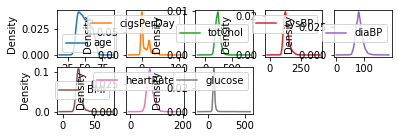

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(200,100))
Dataset_1.plot(kind='density', subplots=True, layout=(4,5), sharex=False)
plt.show()
plt.savefig('densityplot')

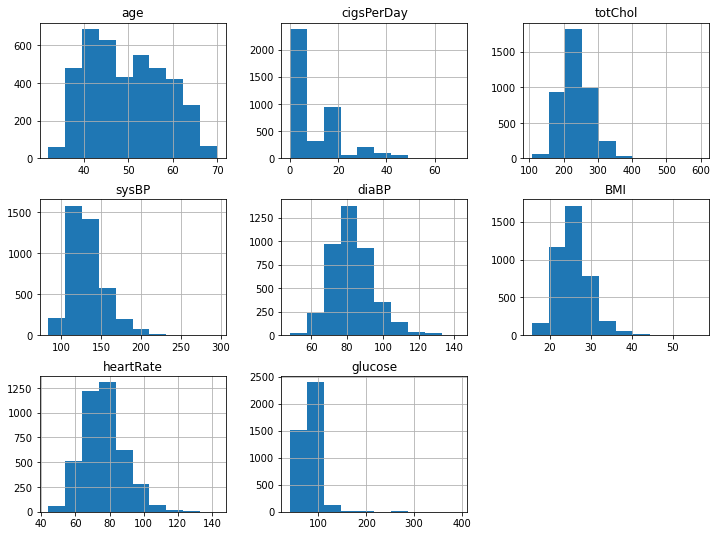

In [ ]:
Dataset_1.hist(figsize=(12,9))
plt.show()

In [ ]:
Dataset_1.skew()

age           0.232006
cigsPerDay    1.228866
totChol       0.664334
sysBP         1.163611
diaBP         0.709407
BMI           0.999606
heartRate     0.670839
glucose       6.281911
dtype: float64

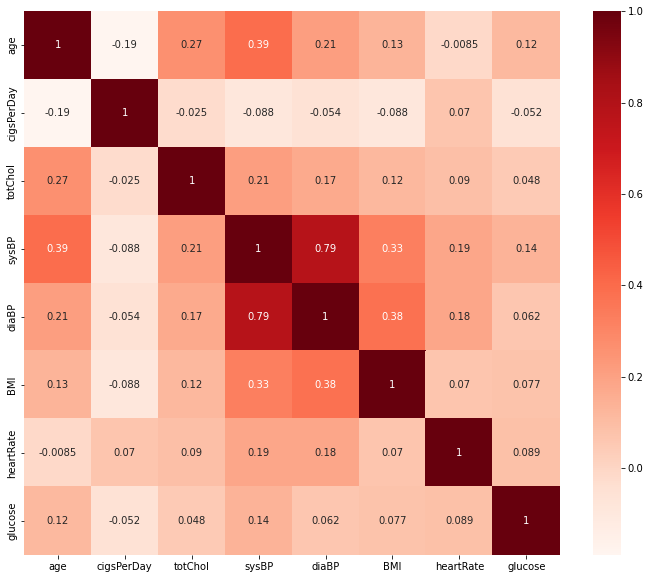

In [ ]:
plt.figure(figsize=(12,10))
cor = Dataset_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

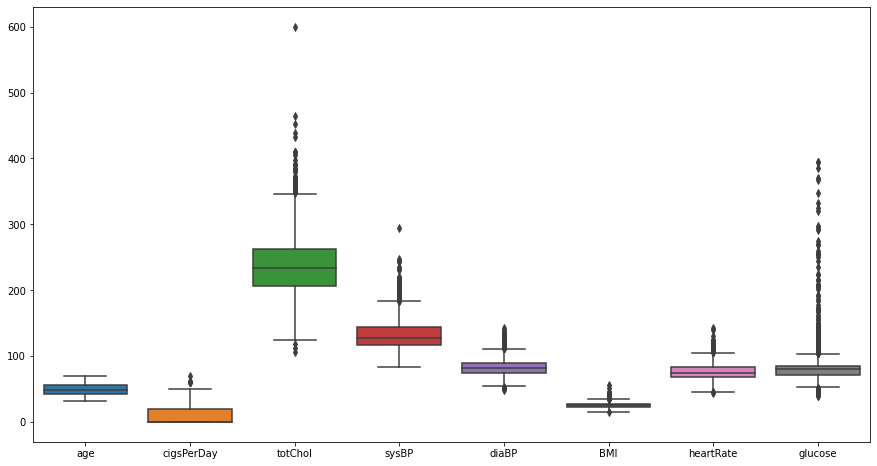

In [ ]:
plt.figure(figsize=(15,8), facecolor='w')
sns.boxplot(data=Dataset_1)
plt.show()

In [ ]:
#Dataset_1['BPMeds'].unique()

In [ ]:
Dataset_1['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,  7.,
        6., 38., 29., 17., 16., 19., 70.])

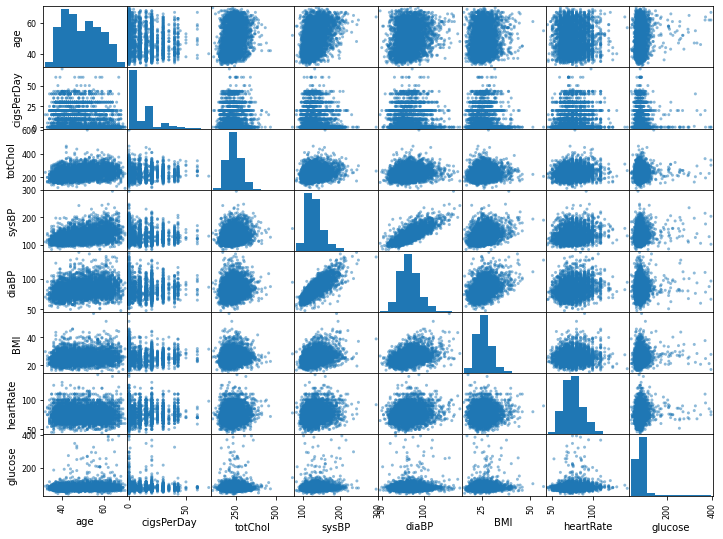

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(Dataset_1,figsize=(12,9))
plt.show()

In [ ]:
#y= Dataset['TenYearCHD']
#X = Dataset.drop(['TenYearCHD'], axis = 1)

In [ ]:
Dataset

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
import matplotlib.pyplot as plt
from numpy import exp
from scipy.stats import boxcox
import numpy as np
from numpy import array
from scipy.linalg import svd
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
import numpy

Dataset_1.infer_objects()

Dataset.reset_index(inplace=True)

colns_with_outliers = []
indicesList = []
for i in range((len(Dataset[num_colns].columns))):
	print('Outliers for column %d' % i)
	#Calculate and print row numbers of values for column i greater than 3 sigma above the median 
	outlier_max = Dataset[num_colns].iloc[:, [i]] > (Dataset[num_colns].iloc[:, [i]].quantile(0.75) + 1.5 * (Dataset[num_colns].iloc[:, [i]].quantile(0.75) - Dataset[num_colns].iloc[:, [i]].quantile(0.25)))
	outlier_min = Dataset[num_colns].iloc[:, [i]] < (Dataset[num_colns].iloc[:, [i]].quantile(0.25) - 1.5 * (Dataset[num_colns].iloc[:, [i]].quantile(0.75) - Dataset[num_colns].iloc[:, [i]].quantile(0.25)))
	indices_max = outlier_max.loc[(outlier_max == True).any(axis=1), :].index.tolist()
	indices_min = outlier_min.loc[(outlier_min == True).any(axis=1), :].index.tolist()
	indices_coln = indices_max + indices_min

	#outlier_coln = numpy.abs((Dataset[num_colns].iloc[:, [i]] - ((Dataset[num_colns].iloc[:, [i]].mean())) >  (3 * (Dataset[num_colns].iloc[:, [i]].std()))))
	
	#indices_coln = outlier_coln.loc[(outlier_coln == True).any(axis=1), :].index.tolist()
	#print('Indices coln', indices_coln)
	
	for j in indices_coln:
		Dataset[Dataset[num_colns].columns[i]][j] = numpy.NaN
	print('Indices beyond 3sigma:', indices_coln)
	print('Total number of outliers:', len(indices_coln))
	print()
	
	if len(indices_coln) > 0:
		colns_with_outliers.append(i)
		indicesList = indicesList + indices_coln
		
print('Columns with outliers:', colns_with_outliers)
print('Rows with outliers:', indicesList)
print()

Outliers for column 0
Indices beyond 3sigma: []
Total number of outliers: 0

Outliers for column 1
Indices beyond 3sigma: [313, 696, 1014, 1390, 1406, 1425, 1775, 2605, 2606, 2893, 3781]
Total number of outliers: 11

Outliers for column 2
Indices beyond 3sigma: [187, 250, 319, 511, 521, 595, 647, 888, 894, 1060, 1067, 1103, 1328, 1385, 1481, 1544, 1619, 1638, 1794, 1855, 1860, 1929, 1939, 2115, 2117, 2182, 2254, 2268, 2272, 2390, 2475, 2501, 2506, 2567, 2690, 2857, 2870, 2938, 3044, 3264, 3288, 3343, 3398, 3437, 3662, 3666, 3699, 3720, 3769, 3853, 3855, 1556, 2426, 3916]
Total number of outliers: 54

Outliers for column 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to b

Indices beyond 3sigma: [42, 63, 82, 103, 148, 153, 240, 246, 250, 284, 314, 319, 355, 391, 397, 427, 461, 509, 545, 566, 568, 641, 674, 724, 740, 802, 833, 872, 892, 900, 901, 915, 966, 1036, 1083, 1134, 1140, 1145, 1148, 1288, 1457, 1479, 1497, 1503, 1523, 1524, 1537, 1538, 1542, 1543, 1548, 1553, 1677, 1780, 1802, 1906, 1922, 1939, 2004, 2006, 2044, 2048, 2073, 2089, 2096, 2106, 2123, 2170, 2171, 2185, 2210, 2213, 2214, 2228, 2320, 2324, 2362, 2424, 2518, 2554, 2579, 2665, 2694, 2728, 2747, 2763, 2797, 2816, 2822, 2837, 2868, 2910, 2915, 2936, 2944, 2956, 3093, 3110, 3223, 3357, 3377, 3420, 3436, 3442, 3480, 3495, 3498, 3535, 3589, 3699, 3701, 3736, 3761, 3780, 3833, 3886, 3890, 3908, 3925, 3926, 3933, 3963, 3969, 4016, 4036, 4065, 4071]
Total number of outliers: 127

Outliers for column 4
Indices beyond 3sigma: [28, 44, 153, 240, 345, 391, 393, 397, 405, 427, 461, 502, 509, 566, 568, 712, 802, 833, 891, 1002, 1097, 1140, 1288, 1323, 1503, 1523, 1524, 1542, 1548, 1552, 1677, 1686, 17

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Indices beyond 3sigma: [22, 35, 42, 63, 91, 93, 96, 110, 138, 152, 205, 219, 240, 248, 275, 281, 299, 343, 350, 361, 376, 397, 399, 406, 416, 424, 432, 443, 445, 452, 459, 520, 563, 570, 582, 592, 615, 624, 641, 647, 669, 682, 717, 727, 730, 737, 740, 758, 766, 777, 802, 803, 806, 814, 817, 833, 854, 867, 903, 911, 919, 932, 939, 971, 978, 992, 1002, 1020, 1028, 1067, 1085, 1091, 1106, 1139, 1180, 1187, 1214, 1229, 1249, 1304, 1352, 1394, 1395, 1422, 1423, 1455, 1486, 1544, 1580, 1604, 1626, 1656, 1669, 1675, 1722, 1754, 1768, 1780, 1788, 1789, 1792, 1823, 1831, 1842, 1854, 1856, 1866, 1891, 1902, 1909, 1914, 1916, 1924, 1951, 1956, 2004, 2080, 2090, 2104, 2126, 2142, 2143, 2164, 2178, 2236, 2278, 2282, 2297, 2306, 2307, 2310, 2320, 2370, 2400, 2405, 2429, 2483, 2498, 2499, 2511, 2523, 2539, 2546, 2562, 2564, 2565, 2599, 2647, 2648, 2694, 2699, 2713, 2717, 2728, 2740, 2746, 2761, 2780, 2782, 2797, 2813, 2846, 2862, 2887, 2961, 2968, 2994, 3033, 3035, 3095, 3104, 3120, 3132, 3161, 3162,

In [ ]:
#Dataset[num_colns].iloc[2, 6].replace(75.0, numpy.NaN, inplace=True)

# Dataset[Dataset[num_colns].columns[2]][6] = numpy.NaN
# Dataset.iloc[6, 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [ ]:
Dataset.drop(columns=[ 'index'], inplace=True)

Dataset.isnull().sum()
#Dataset

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay          11
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             54
sysBP              127
diaBP               84
BMI                 96
heartRate           76
glucose            249
TenYearCHD           0
dtype: int64

In [ ]:
# Dataset without both outliers and missing data
Dataset2 = Dataset.fillna(Dataset.mean())

print('Data without outliers:\n', Dataset2)
print()

Data without outliers:
       Sex  age  education  ...  heartRate     glucose  TenYearCHD
0       1   39        4.0  ...       80.0   77.000000           0
1       0   46        2.0  ...       95.0   76.000000           0
2       1   48        1.0  ...       75.0   70.000000           0
3       0   61        3.0  ...       65.0  103.000000           1
4       0   46        3.0  ...       85.0   85.000000           0
...   ...  ...        ...  ...        ...         ...         ...
4077    1   51        3.0  ...       65.0   68.000000           0
4078    0   44        1.0  ...       86.0   82.000000           0
4079    0   52        2.0  ...       80.0   78.411166           0
4080    1   40        3.0  ...       67.0   72.000000           0
4081    0   39        3.0  ...       85.0   80.000000           0

[4082 rows x 16 columns]



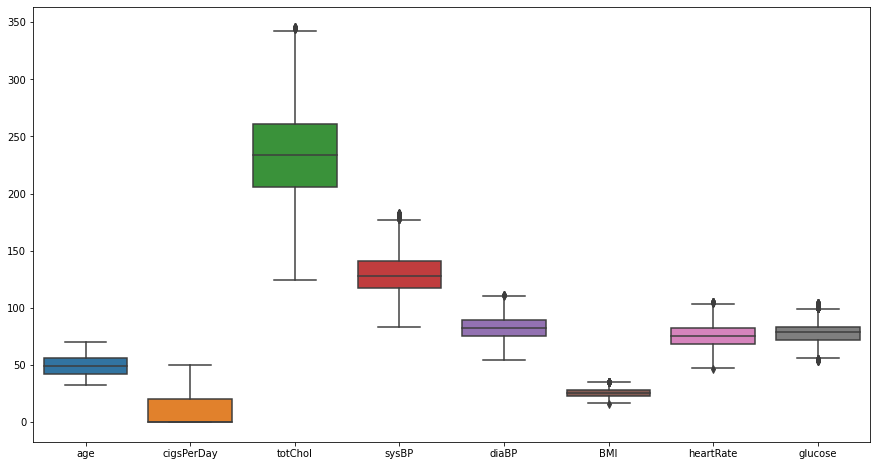

In [ ]:
plt.figure(figsize=(15,8), facecolor='w')
sns.boxplot(data=Dataset2[num_colns])
plt.show()

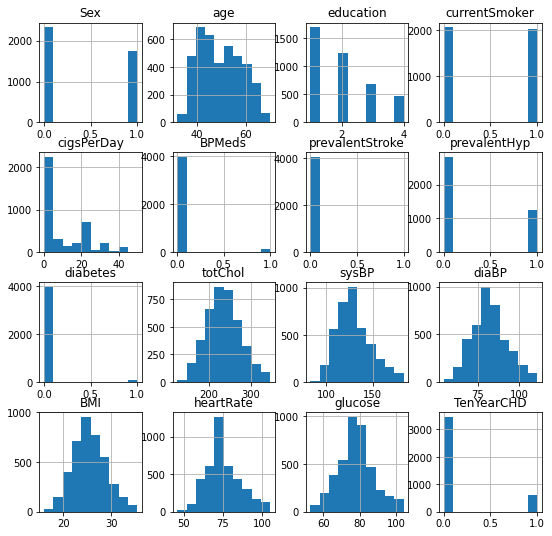

In [ ]:
Dataset2.hist(figsize=(9,9))
plt.show()

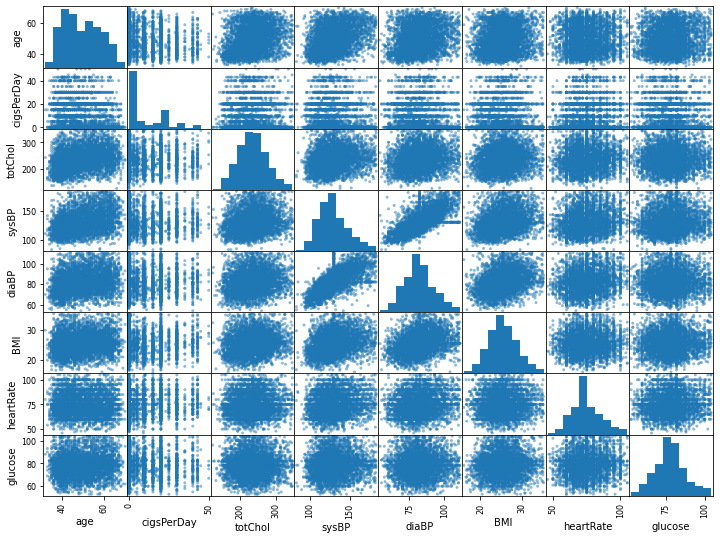

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(Dataset2[num_colns],figsize=(12,9))
plt.show()

In [ ]:
Dataset2.head(20)

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
Dataset2['prevalentHyp'].unique()

array([0, 1])

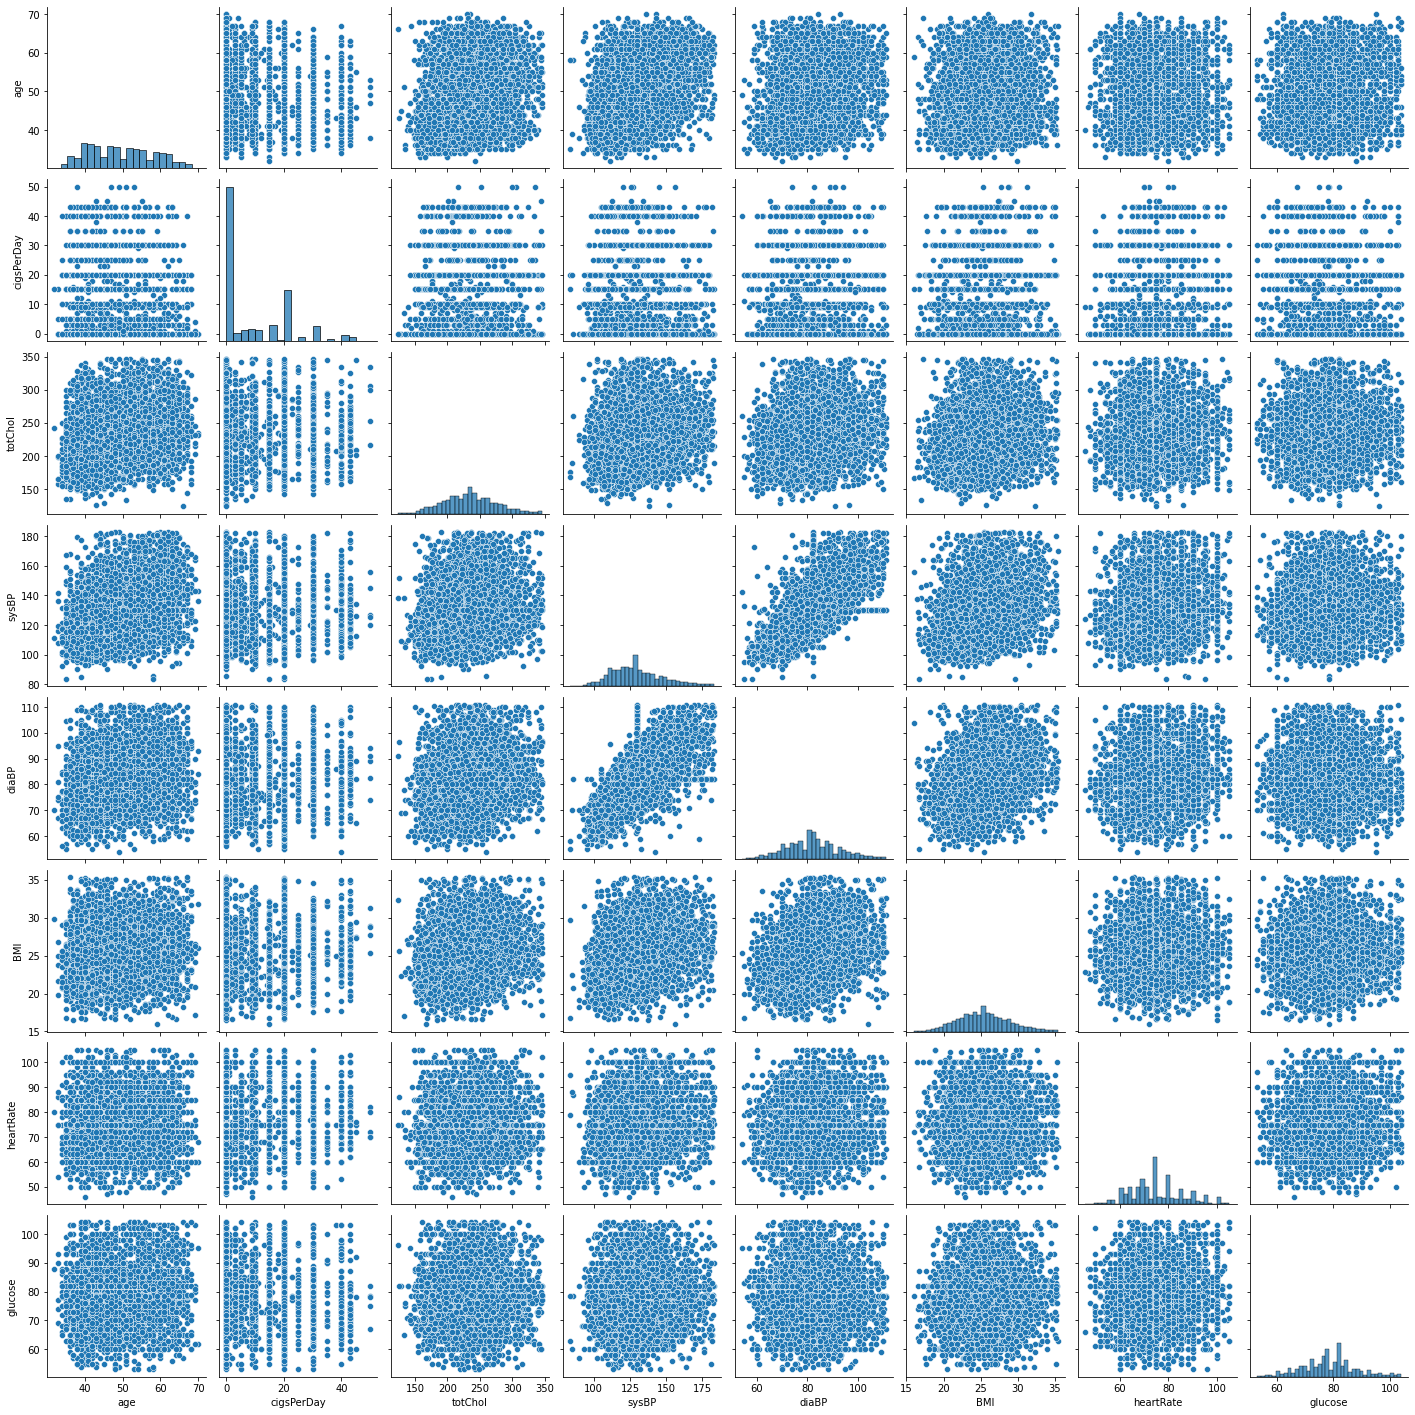

In [ ]:
sns.pairplot(Dataset2[num_colns])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0,1)) 

cat_colns = [name for name in Dataset2.columns if name not in Dataset2[num_colns].columns]
print(cat_colns)

# print(Dataset2[cat_colns])

#assign scaler to column:
Dataset_scaled = pd.DataFrame(scaler.fit_transform(Dataset2[num_colns]), columns=Dataset2[num_colns].columns)
Dataset_scaled = pd.concat([Dataset_scaled, Dataset2[cat_colns]], axis=1)

Dataset_scaled




['Sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Sex,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.184211,0.00,0.319820,0.226131,0.280702,0.567818,0.576271,0.470588,1,4.0,0,0.0,0,0,0,0
1,0.368421,0.00,0.567568,0.376884,0.473684,0.658587,0.830508,0.450980,0,2.0,0,0.0,0,0,0,0
2,0.421053,0.40,0.545045,0.442211,0.456140,0.483755,0.491525,0.333333,1,1.0,1,0.0,0,0,0,0
3,0.763158,0.60,0.454955,0.668342,0.719298,0.650851,0.322034,0.980392,0,3.0,1,0.0,0,1,0,1
4,0.368421,0.46,0.725225,0.467337,0.526316,0.368231,0.661017,0.627451,0,3.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,0.500000,0.86,0.373874,0.432161,0.456140,0.193399,0.322034,0.294118,1,3.0,1,0.0,0,0,0,0
4078,0.315789,0.30,0.387387,0.432161,0.578947,0.165034,0.677966,0.568627,0,1.0,1,0.0,0,0,0,0
4079,0.526316,0.00,0.653153,0.502513,0.508772,0.284167,0.576271,0.498258,0,2.0,0,0.0,0,0,0,0
4080,0.210526,0.00,0.274775,0.577889,0.771930,0.497163,0.355932,0.372549,1,3.0,0,0.0,0,1,0,0


In [ ]:
Dataset_scaled.shape

(4082, 16)

In [ ]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv
import numpy

Class 0: 3465
Class 1: 617
Proportion: 5.62 : 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


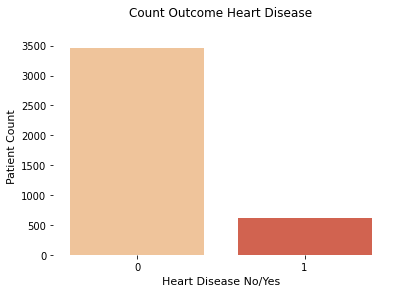

age: 0.038853
cigsPerDay: 0.000000
totChol: 0.001397
sysBP: 0.015416
diaBP: 0.016387
BMI: 0.003856
heartRate: 0.005285
glucose: 0.000000
Sex: 0.000000
education: 0.006140
currentSmoker: 0.012391
BPMeds: 0.013922
prevalentStroke: 0.007435
prevalentHyp: 0.015898
diabetes: 0.000136


In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
# clarify what is y and what is x label
y= Dataset_scaled['TenYearCHD']
X = Dataset_scaled.iloc[:, 0:-1]
# Checking balance of outcome variable
target_count = Dataset_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(Dataset_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()
#X = Dataset_scaled.loc[:, ['age', 'diabetes','cigsPerDay','prevalentStroke', 'sysBP','BPMeds', 'prevalentHyp','Sex']]
# print(X)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=6)
# apply feature selection
X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)

 #divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('%s: %f' % (Dataset_scaled.columns[i], fs.scores_[i]))

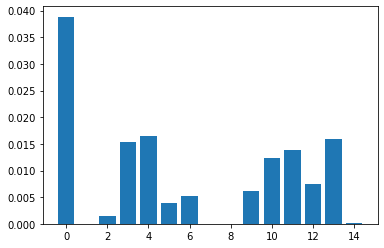

In [ ]:
# plot the scores
from matplotlib import pyplot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:

#from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#reg = LassoCV()
#reg.fit(X, y)
#print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
#print("Best score using built-in LassoCV: %f" %reg.score(X,y))
#coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000030
Best score using built-in LassoCV: 0.087959


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

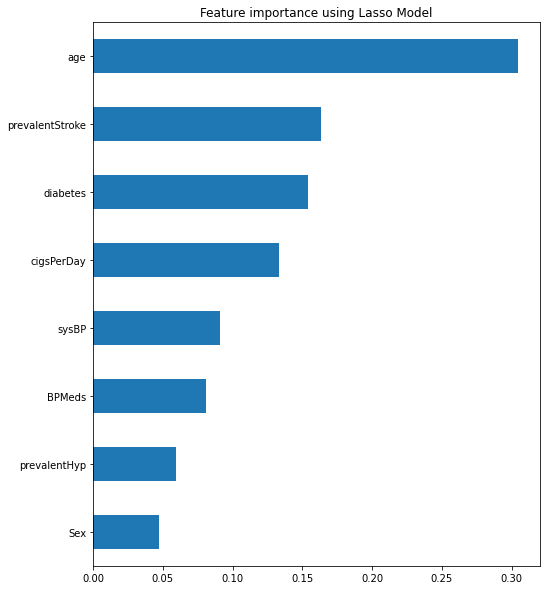

In [ ]:
#imp_coef = coef.sort_values()
#import matplotlib
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
#imp_coef.plot(kind = "barh")
#plt.title("Feature importance using Lasso Model")

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
## Input variables
validation_size = 0.25
seed = 42
scoring = 'roc_auc' #'accuracy'


In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000, C= 1, penalty= 'l2', solver= 'lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel= 'rbf', gamma= 0.001, C= 0.1)))
models.append(('RF', RandomForestClassifier()))
# evaluate each model using AUC
print('*** Cross-Validation Testing - AUC \n')
results = []
names = []
for name, model in models:
  kfold = StratifiedShuffleSplit(n_splits=10)  #, random_state=seed
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s \t: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

*** Cross-Validation Testing - AUC 

LR 	: 0.726852 (0.031895)
KNN 	: 0.598347 (0.029656)
CART 	: 0.561578 (0.040494)
NB 	: 0.718004 (0.031257)
SVM 	: 0.532989 (0.090918)
RF 	: 0.701282 (0.042190)


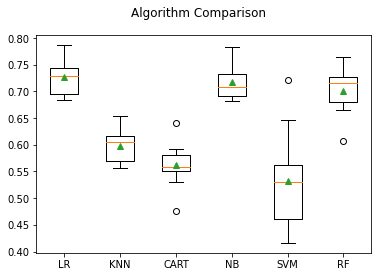

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
## Prediction test based on hold-out samples
print('*** Prediction Accuracy - AUC \n')
list_pred = []
for i in range(len(models)):
  model_acc = roc_auc_score(y_test, models[i][1].fit(X_train, y_train).predict(X_test))
  list_pred.append(model_acc)
  print(models[i][0], "\t:", model_acc)

*** Prediction Accuracy - AUC 

LR 	: 0.5127275241351569
KNN 	: 0.5130543543845536
CART 	: 0.5232615144810941
NB 	: 0.5473589601769911
SVM 	: 0.5
RF 	: 0.49945318785197107


In [ ]:
### Hyper-parameter tuning of the highest-performing model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
### Tunning for LR
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
"penalty": ['none', 'l1', 'l2', 'elasticnet'],
"solver": ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10,
scoring='roc_auc', refit = True, verbose = 3, n_jobs= -1)
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print()
print("AUC score :",grid.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

AUC score : 0.7282297922674538


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is 

In [ ]:

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#Smote
oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)

                                            

In [ ]:
X_resample

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Sex,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.184211,0.000000,0.319820,0.226131,0.280702,0.567818,0.576271,0.470588,1,4.000000,0,0.0,0,0,0
1,0.368421,0.000000,0.567568,0.376884,0.473684,0.658587,0.830508,0.450980,0,2.000000,0,0.0,0,0,0
2,0.421053,0.400000,0.545045,0.442211,0.456140,0.483755,0.491525,0.333333,1,1.000000,1,0.0,0,0,0
3,0.763158,0.600000,0.454955,0.668342,0.719298,0.650851,0.322034,0.980392,0,3.000000,1,0.0,0,1,0
4,0.368421,0.460000,0.725225,0.467337,0.526316,0.368231,0.661017,0.627451,0,3.000000,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,0.568619,0.000000,0.357963,0.614335,0.661761,0.399815,0.268817,0.645055,1,2.000000,0,0.0,0,1,0
6926,0.547503,0.600000,0.477457,0.266984,0.255791,0.296196,0.319320,0.645785,1,1.000000,1,0.0,0,0,0
6927,0.447774,0.189949,0.518249,0.213942,0.342240,0.248278,0.508127,0.460231,0,3.497433,1,0.0,0,0,0
6928,0.341931,0.349670,0.432790,0.692703,0.903335,0.416055,0.390503,0.451758,1,1.000000,1,0.0,0,1,0


In [ ]:
y_resample

0       0
1       0
2       0
3       1
4       0
       ..
6925    1
6926    1
6927    1
6928    1
6929    1
Name: TenYearCHD, Length: 6930, dtype: int64

Class 0: 3465
Class 1: 3465
Proportion: 1.0 : 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


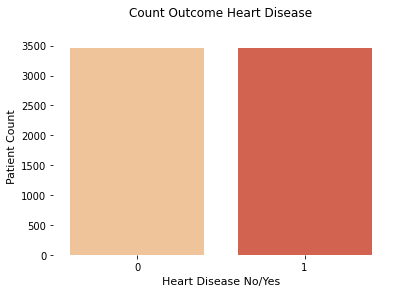

In [ ]:
# Checking balance of outcome variable
target_count = y_resample.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(y_resample, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=6)
# apply feature selection
X_selected = fs.fit_transform(X_resample, y_resample)


 #divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.2, random_state=10)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('%s: %f' % (Dataset_scaled.columns[i], fs.scores_[i]))

age: 0.408081
cigsPerDay: 0.128433
totChol: 0.336217
sysBP: 0.347060
diaBP: 0.363671
BMI: 0.077381
heartRate: 0.361150
glucose: 0.370805
Sex: 0.003118
education: 0.008793
currentSmoker: 0.006240
BPMeds: 0.010121
prevalentStroke: 0.000000
prevalentHyp: 0.030658
diabetes: 0.003732


In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000, C= 1, penalty= 'l2', solver= 'lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel= 'rbf', gamma= 0.001, C= 0.1)))
models.append(('RF', RandomForestClassifier()))
# evaluate each model using AUC
print('*** Cross-Validation Testing - AUC \n')
results = []
names = []
for name, model in models:
  kfold = StratifiedShuffleSplit(n_splits=10)  #, random_state=seed
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s \t: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

*** Cross-Validation Testing - AUC 

LR 	: 0.729461 (0.020252)
KNN 	: 0.886542 (0.011446)
CART 	: 0.784070 (0.010890)
NB 	: 0.721225 (0.023489)
SVM 	: 0.655441 (0.028593)
RF 	: 0.946337 (0.006369)


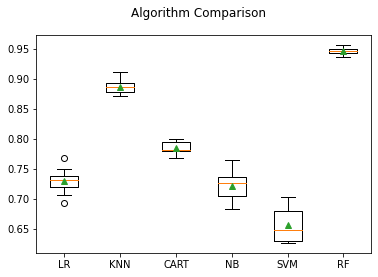

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
## Prediction test based on hold-out samples
print('*** Prediction Accuracy - AUC \n')
list_pred = []
for i in range(len(models)):
  model_acc = roc_auc_score(y_test, models[i][1].fit(X_train, y_train).predict(X_test))
  list_pred.append(model_acc)
  print(models[i][0], "\t:", model_acc)

*** Prediction Accuracy - AUC 

LR 	: 0.6746707792789322
KNN 	: 0.7794361750206706
CART 	: 0.7859091656964816
NB 	: 0.6652882750979383
SVM 	: 0.5
RF 	: 0.8768996707272119


In [ ]:
#NOT included
### Hyper-parameter tuning of the highest-performing model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
### Tunning for LR
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
"penalty": ['none', 'l1', 'l2', 'elasticnet'],
"solver": ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10,
scoring='roc_auc', refit = True, verbose = 3, n_jobs= -1)
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print()
print("AUC score :",grid.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

AUC score : 0.7260712794887979


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is 

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(class_weight='balanced',random_state=0)
model1 = logit.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix
accuracy_score(y_test,y_pred1)

0.6585067319461444

In [ ]:
precision_score(y_test,y_pred1)

0.22697368421052633

In [ ]:
recall_score(y_test,y_pred1)

0.6106194690265486

In [ ]:
f1_score(y_test,y_pred1)

0.33093525179856115

In [ ]:
y_proba1 = model1.predict_proba(X_test)[:,1]
confusion_matrix(y_test,y_pred1)

array([[469, 235],
       [ 44,  69]])

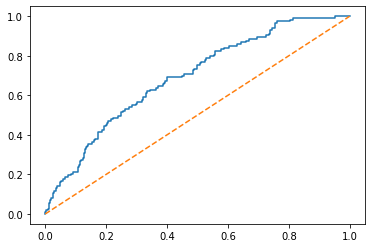

In [ ]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_proba1)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls = '--')

In [ ]:
roc_auc_score(y_test,y_proba1)

0.6905797465808527

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

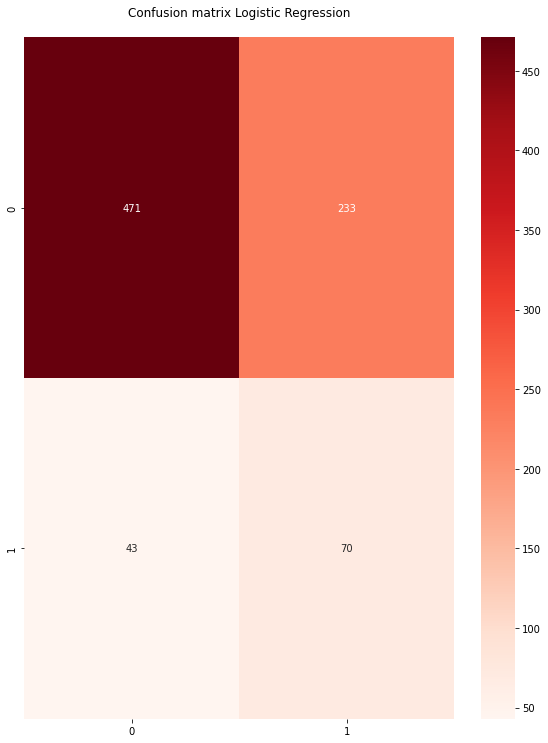

In [ ]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test,y_pred1 )

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [ ]:
#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

The accuracy score for SVM is: 86.4%
The f1 score for SVM is: 3.5000000000000004%
The precision score for SVM is: 100.0%
The recall score for SVM is: 1.7999999999999998%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

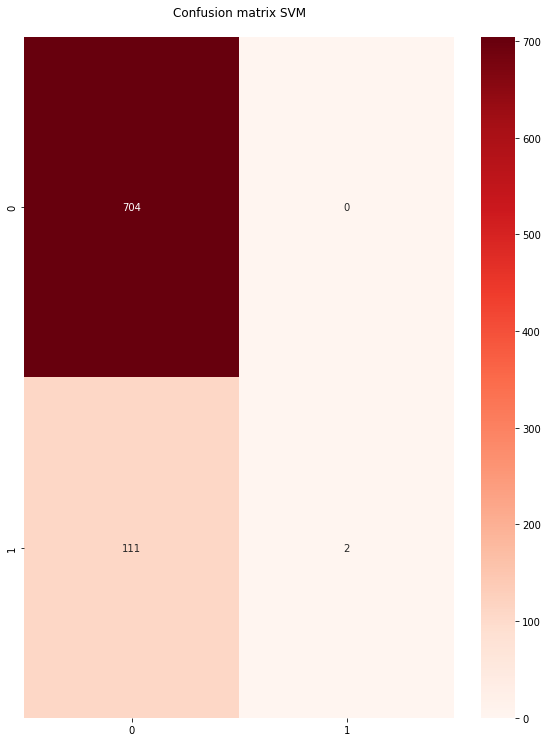

In [ ]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

In [ ]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 76.9%
The f1 score for DTC is: 20.3%
The precision score for DTC is: 19.400000000000002%
The recall score for DTC is: 21.2%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

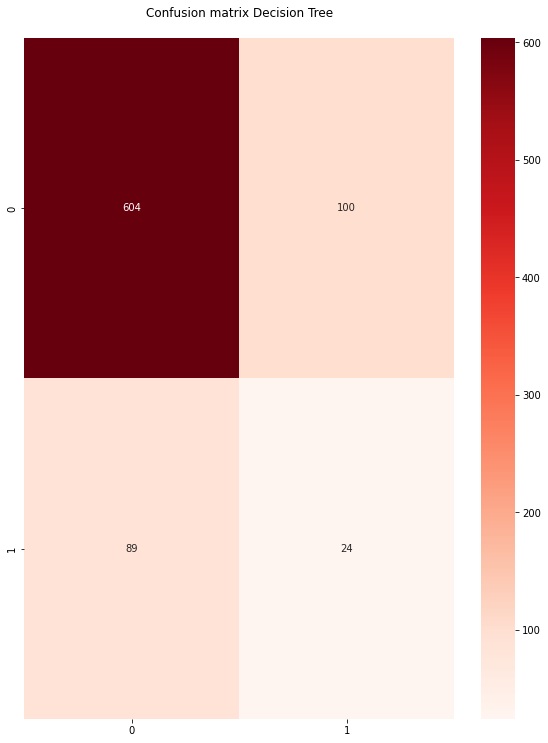

In [ ]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

In [ ]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 85.1%
The f1 score for KNN is: 9.0%
The precision score for KNN is: 28.599999999999998%
The recall score for KNN is: 5.3%


In [ ]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  85.06731946144431 %
The accuracy score of the training data is:  88.39 %


In [ ]:
# Perform cross validation
from sklearn.model_selection import cross_val_score
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.83231334 0.83476132 0.84068627 0.84803922 0.83578431]
The Accuracy of Model with Cross Validation is: 83.83%


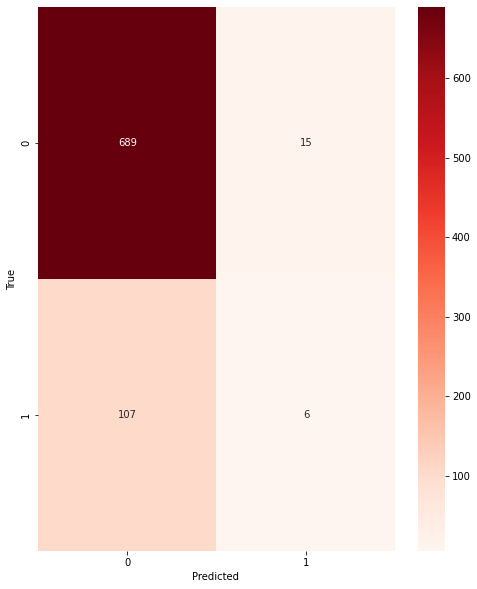

In [ ]:
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

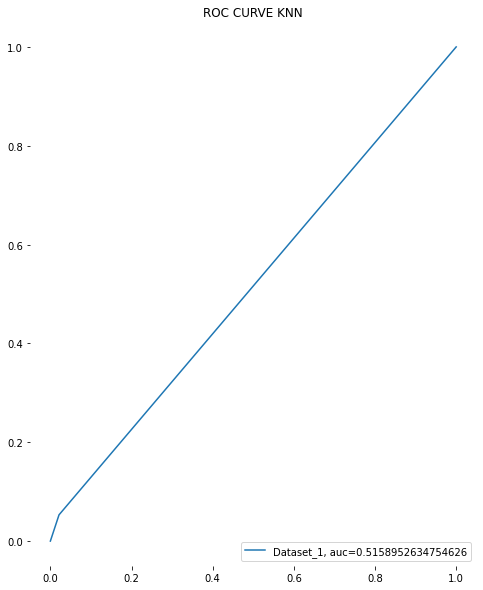

The score for the AUC ROC Curve is: 51.6%


In [ ]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="Dataset_1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

In [ ]:
X.dtype